# Curso de Big Data


## Trabajo Práctico 2 - Parte 1

### Grupo: 

* Alexander Pacheco
* Rafael Paganini
* Alan Starobinski

### Inciso 1


#### Utilizando información disponible en la página del INDEC, expliquen brevemente cómo se identifica a las personas pobres.

En Argentina, las personas que son consideradas pobres son aquellas que pertenecen a un hogar cuyo ingreso resulta estar por debajo de la "línea de pobreza". Es decir, son pobres aquellas personas que son parte de un hogar que no es capaz de adquirir los bienes y servicios necesarios que se consideran básicos para convivir dignamente en sociedad y desarrollarse personalmente.

### Inciso 2

#### Sección a)

In [1]:
# !pip install heatmapz

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from heatmap import heatmap, corrplot
from PIL import Image



In [2]:
# Se define el directorio
os.chdir(r'C:\Users\Rafael\Desktop\Cosas\Encare\Master UdeSA\Tercer trimestre\Big Data\TPs\TP2')
#os.chdir('/Users/alexanderpacheco/Desktop/Mecon_udesa/big_data/TPS/TP2')

In [3]:
# Descargamos la EPH a nivel individual
df_eph = pd.read_excel("EPH_usu_1er_Trim_2023_xlsx/usu_individual_T123.xlsx")
df_eph.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNORVWHLMKOCDEOHCH00720228,2023,1,1,5,0,44,N,91,112,...,10.0,9,79700.0,6,6.0,5,NaN,7.0,5,133
1,TQRMNOPSTHKMKPCDEOHCH00781447,2023,1,1,1,1,44,N,91,190,...,6.0,5,180000.0,9,10.0,9,NaN,10.0,9,200
2,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,1,1,44,N,91,134,...,8.0,8,145000.0,9,9.0,8,NaN,9.0,8,140
3,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,2,1,44,N,91,134,...,8.0,8,145000.0,9,9.0,8,NaN,9.0,8,140
4,TQRMNOQYTHMNKSCDEOHCH00803178,2023,1,1,1,1,44,N,91,120,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0


In [4]:
print('La muestra completa contiene', len(df_eph), 'observaciones')

La muestra completa contiene 48638 observaciones


In [5]:
# Nos quedamos con las observaciones Ciudad Autónoma de Buenos Aires y Gran Buenos Aires
df_ba = df_eph[(df_eph['AGLOMERADO'] == 32) | (df_eph['AGLOMERADO'] == 33)]
print('Ahora tenemos', len(df_ba), 'observaciones')

Ahora tenemos 7619 observaciones


#### Sección b): Limpieza de datos

In [6]:
# Se eliminan las edades negativas de la base
df_ba = df_ba[(df_ba['CH06'] >= 0)]

# Nos quedamos con las observaciones de los individuos que respondieron sobre su estado civil
df_ba = df_ba[(df_ba['CH07'] <= 5)]

# Se descartan a los individuos que no saben o no respondieron sobre su cobertura médica
df_ba = df_ba[(df_ba['CH08'] != 9)]

# Se elimina los que no respondieron cuánto cobraron por mes los asalariados
df_ba = df_ba[(df_ba['PP08D1'] != -9)]

# Se eliminan las observaciones que no cuentan con una respuesta en el cuestionario individual sobre 
# su condición de actividad
df_ba = df_ba[(df_ba['ESTADO'] != 0)]

print('Ahora tenemos', len(df_ba), 'observaciones')

Ahora tenemos 6770 observaciones


In [7]:
# Se genera la variable Edad para luego unirla con la base 'tabla_adulto_equiv.xlsx'
conditions = [
    (df_ba['CH06'] == 1),
    (df_ba['CH06'] == 2),
    (df_ba['CH06'] == 3),
    (df_ba['CH06'] == 4),
    (df_ba['CH06'] == 5),
    (df_ba['CH06'] == 6),
    (df_ba['CH06'] == 7),
    (df_ba['CH06'] == 8),
    (df_ba['CH06'] == 9),
    (df_ba['CH06'] == 10),
    (df_ba['CH06'] == 11),
    (df_ba['CH06'] == 12),
    (df_ba['CH06'] == 13),
    (df_ba['CH06'] == 14),
    (df_ba['CH06'] == 15),
    (df_ba['CH06'] == 16),
    (df_ba['CH06'] == 17),
    (df_ba['CH06'].between(18, 29, inclusive='both')),
    (df_ba['CH06'].between(30, 45, inclusive='both')),
    (df_ba['CH06'].between(46, 60, inclusive='both')),
    (df_ba['CH06'].between(61, 75, inclusive='both')),
    (df_ba['CH06'].between(76, 99, inclusive='both'))
]

values = [
    "1 año",
    "2 años",
    "3 años",
    "4 años",
    "5 años",
    "6 años",
    "7 años",
    "8 años",
    "9 años",
    "10 años",
    "11 años",
    "12 años",
    "13 años",
    "14 años",
    "15 años",
    "16 años",
    "17 años",
    "18 a 29 años",
    "30 a 45 años",
    "46 a 60 años",
    "61 a 75 años",
    "más de 75 años"
]

# Aplicar las condiciones y los valores a la nueva columna 'Edad'
df_ba['Edad'] = np.select(conditions, values, default='')

#### Sección c): Gráfico de barras mostrando la composición por sexo

In [8]:
# Se define un data frame que contenga solo la variable CH04
graph_sexo = df_ba['CH04'].reset_index()

In [9]:
# Se renombra la variable y se genera la variable Sexo
graph_sexo = graph_sexo.rename(columns={'CH04':'Sexo'})
graph_sexo['Sexo'] = graph_sexo['Sexo'].replace({1:'Varón', 2:'Mujer'})

In [10]:
graph_sexo

,index,Sexo
0,102,Mujer
1,103,Varón
2,104,Varón
3,105,Mujer
4,106,Mujer
...,...,...
6765,48595,Mujer
6766,48596,Varón
6767,48597,Mujer
6768,48598,Mujer


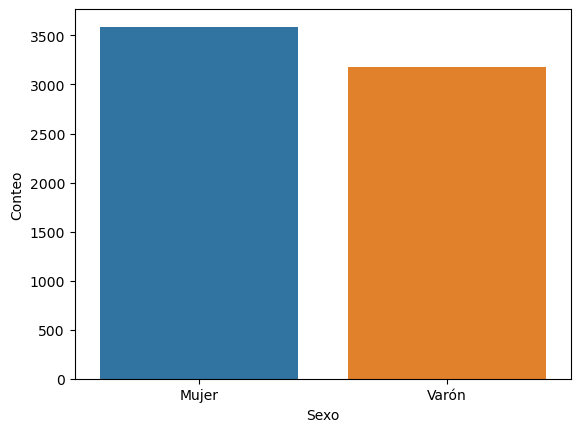

In [11]:
# Se genera el gráfico de barras y se guarda
sns.countplot(x = 'Sexo', data=graph_sexo)
plt.ylabel('Conteo')
plt.savefig('countplot_sexo.png')

In [12]:
varones = (graph_sexo['Sexo'] == 'Varón').sum()
mujeres = (graph_sexo['Sexo'] == 'Mujer').sum()
print('Hay', varones, 'varones y', mujeres, 'mujeres')

Hay 3181 varones y 3589 mujeres


#### Sección d): Matriz de correlación

In [13]:
# Se generan dummies para cada categoría de las variables categóricas con el comando pd.get_dummies

# Estado civil a partir de la variable 'CH07'
estado_civil = pd.get_dummies(df_ba['CH07'], dtype=int)
estado_civil = estado_civil.rename(columns={1:'unido', 2:'casado', 3:'separado_o_divorciado', 4:'viudo', 5:'soltero'})
# Se genera una variable de interés para luego utilizarla en la matriz de correlación.
# Se define la variable dummy 'con_pareja' que toma el valor de 1 si está unida/o o casada/o
estado_civil['con_pareja'] = np.where((estado_civil['unido'] == 1) | (estado_civil['casado'] == 1), 1, 0)

# Cobertura médica a partir de la variable 'CH08'
cobertura_medica = pd.get_dummies(df_ba['CH08'], dtype=int)
cobertura_medica = cobertura_medica.rename(columns={1:'obra_social', 2:'mutual_prep_se', 3:'plan_seg_pub', 4:'no_paga', 12:'os_mutual_prep_se'})
# Se define la variable dummy 'tiene_cobertura_med' que toma el valor de 1 si tiene cobertura médica; es decir,
# que tiene cobertura médica mediante obra social, prepaga, servicio de emergencia, etc.
cobertura_medica['tiene_cobertura_med'] = np.where((cobertura_medica['no_paga'] == 0), 1, 0)

# Se convierte en variable dummy que indica el sexo del individuo.
# Se toma como base a la mujer y se le imputa 0 en lugar de 2.
df_ba['CH04'] = df_ba['CH04'].replace({2:0})

# Reemplazamos con 0 en lugar de 7 dado que 7 representa a las observaciones que no tienen instrucción
df_ba['NIVEL_ED'] = df_ba['NIVEL_ED'].replace({7:0})

# Condición de actividad a partir de la variable 'ESTADO'
actividad = pd.get_dummies(df_ba['ESTADO'], dtype=int)
actividad = actividad.rename(columns={1:'ocupado', 2:'desocupado', 3:'inactivo', 4:'menor_10anios'})

# Categoría de inactividad a partir de la variable 'CAT_INAC'
inactividad = pd.get_dummies(df_ba['CAT_INAC'], dtype=int)
inactividad = inactividad.rename(columns={0:'activos', 1:'jubi_pensionado', 2:'rentista', 3:'estudiante', 4:'ama_de_casa', 5:'menor_6anios', 6:'discapacitado', 7:'inac_otros'})
# Se define la variable dummy 'inactivo_permanente' que toma el valor de 1 si se considera que es más probable
# que permanezca inactivo a lo largo del resto de su vida
inactividad['inactivo_permanente'] = np.where((inactividad['jubi_pensionado'] == 1) | (inactividad['discapacitado'] == 1), 1, 0)

# Se guardan en una base las variables de interés para la matriz de correlación de la base de datos original
vars_df_ba = df_ba[['CH04', 'NIVEL_ED', 'IPCF']]
vars_df_ba = vars_df_ba.rename(columns={'CH04':'Varón'})

# Se unen todos los data frames que se considerarán para el análisis
matr_corr = pd.concat([vars_df_ba, estado_civil, cobertura_medica, actividad, inactividad], axis=1)


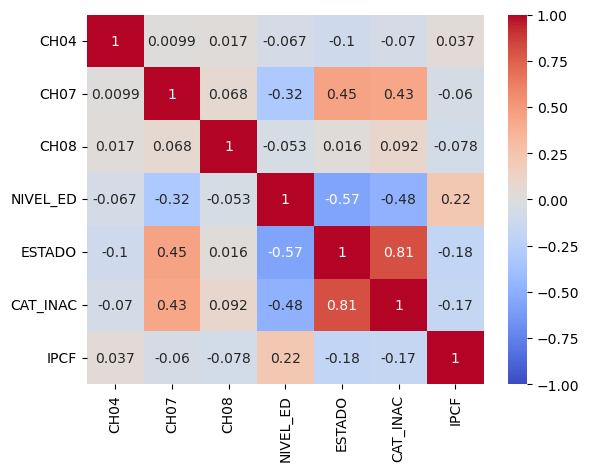

In [14]:
# Se realiza la matriz de correlación con las variables que se indican en la consigna
corr_columns1 = df_ba[['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']]
heatmap_1 = sns.heatmap(corr_columns1.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
heatmap_1.figure.savefig('matriz_correlaciones_1.png')
# Sin embargo, se debe tener en cuenta que las variables categóricas 'CH07', 'CH08', 'ESTADO' y 'CAT_INAC'
# no determinan un orden; es decir, por ejemplo, la variable 'CAT_INAC' contiene las categorías que existen
# dada la inactividad de la observación, pero no denota un orden en el sentido de que ser jubilado o pensionista
# no es menos que ser un rentista dado los valores que se le imputan en la EPH.

# Por ello, se construyeron las variables 'con_pareja', 'tiene_cobertura_med', 'ocupado', 'desocupado',
# 'inactivo' y 'inactivo_permanente' a partir de las variables categóricas para hacer un análisis de las
# correlaciones que valgan la pena analizar.

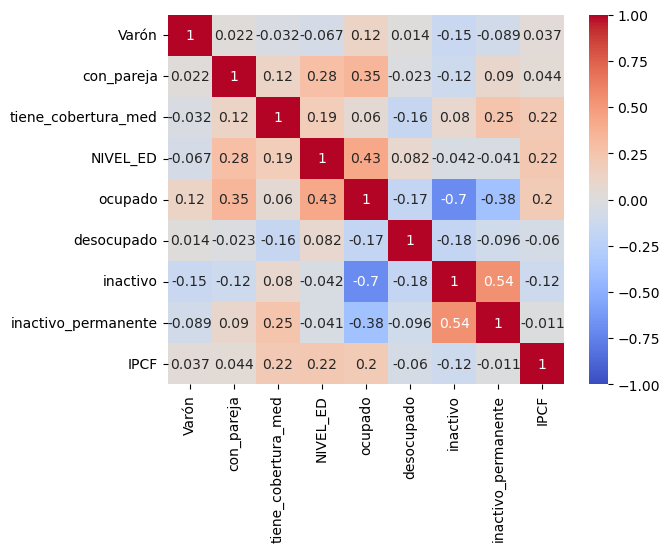

In [15]:
# Se seleccionan las variables de interés para el análisis de correlación a partir de la siguiente matriz
# No se consideran a todas las dummies que se generaron mediante las variables categórias porque la matriz
# resultaría demasiado grande
corr_columns2 = matr_corr[['Varón', 'con_pareja', 'tiene_cobertura_med', 'NIVEL_ED', 'ocupado',
                          'desocupado', 'inactivo', 'inactivo_permanente', 'IPCF']]
heatmap_2 = sns.heatmap(corr_columns2.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

heatmap_2.figure.savefig('matriz_correlaciones_2.png')



In [16]:
# Se combinan ambas matrices para incluirla en el reporte
hmap1 = Image.open('matriz_correlaciones_1.png')
hmap2 = Image.open('matriz_correlaciones_2.png')

heatmap_combinada = Image.new('RGB', (2 * hmap1.width, hmap1.height))

# Se pegan y guardan las matrices combinadas
heatmap_combinada.paste(hmap1, (0, 0))
heatmap_combinada.paste(hmap2, (hmap1.width, 0))
heatmap_combinada.save('heatmap_combinada.png')

#### Sección e)

In [17]:
desocupados = (actividad['desocupado'] == 1).sum()
inactivos = (actividad['inactivo'] == 1).sum()

print('Hay', desocupados, 'desocupados y', inactivos, 'inactivos')

Hay 286 desocupados y 2826 inactivos


In [18]:
df_ocupados = df_ba[df_ba['ESTADO'] == 1]
df_desocupados = df_ba[df_ba['ESTADO'] == 2]
df_inactivos = df_ba[df_ba['ESTADO'] == 3]


print('La media de ingreso per cápita familiar de los ocupados es', df_ocupados['IPCF'].mean(),
      ', la de los desocupados es', df_desocupados['IPCF'].mean(),'y la de los inactivos es', df_inactivos['IPCF'].mean())

# Otra forma de hacerlo es mediante el comando groupby
# media_por_sexo = df_ba.groupby('ESTADO')['IPCF'].mean()

La media de ingreso per cápita familiar de los ocupados es 76055.79310732415 , la de los desocupados es 25536.022202797205 y la de los inactivos es 40089.138287331916


#### Sección f)

In [19]:
# Se importa la base 'tabla_adulto_equiv.xlsx' para luego unirla a la base principal
df_adult_eq = pd.read_excel("tabla_adulto_equiv.xlsx", header=3, usecols="A:C", nrows=25)
df_adult_eq

,Edad,Mujeres,Varones
0,NaN,NaN,NaN
1,Menor de 1 año,0.35,0.35
2,1año,0.37,0.37
3,2 años,0.46,0.46
4,3 años,0.51,0.51
5,4 años,0.55,0.55
6,5 años,0.60,0.60
7,6 años,0.64,0.64
8,7 años,0.66,0.66
9,8 años,0.68,0.68


In [20]:
# Se reemplaza '1año' por '1 año' en la variable 'Edad' para que se pueda hacer un merge adecuado
df_adult_eq['Edad'] = df_adult_eq['Edad'].replace('1año', '1 año')
# Se elimina el único missing de la base debido al formato tabla en Excel
df_adult_eq = df_adult_eq.dropna(subset=['Edad'])
# Se elimina aquellos que tengan menos de 1 año debido a que no se tienen observaciones con esta característica
# en la base principal
df_adult_eq = df_adult_eq[df_adult_eq['Edad'] != "Menor de 1 año"]


In [21]:
# Se transforma la base a un formato long para que se pueda hacer un merge adecuado con la base principal
# para utilizar el sexo y la edad como variables identificadoras
df_adult_eq = pd.melt(df_adult_eq, id_vars=['Edad'], value_vars=['Varones', 'Mujeres'], var_name='Sexo')


In [22]:
# Se crea una nueva columna con el mismo nombre y formato que la base principal para poder hacer el merge
df_adult_eq.loc[df_adult_eq['Sexo'] == "Varones", 'CH04'] = 1
df_adult_eq.loc[df_adult_eq['Sexo'] == "Mujeres", 'CH04'] = 0
df_adult_eq['CH04'] = df_adult_eq['CH04'].astype('int64')
# Se renombra la variable 'value' a 'adulto_equiv'
df_adult_eq = df_adult_eq.rename(columns={'value': 'adulto_equiv'})

df_adult_eq

,Edad,Sexo,adulto_equiv,CH04
0,1 año,Varones,0.37,1
1,2 años,Varones,0.46,1
2,3 años,Varones,0.51,1
3,4 años,Varones,0.55,1
4,5 años,Varones,0.60,1
5,6 años,Varones,0.64,1
6,7 años,Varones,0.66,1
7,8 años,Varones,0.68,1
8,9 años,Varones,0.69,1
9,10 años,Varones,0.79,1


In [23]:
# Realizamos el merge con la base principal
df_ba_equiv = pd.merge(df_ba, df_adult_eq, on=['Edad', 'CH04'], how='left')
df_ba_equiv

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,Edad,Sexo,adulto_equiv
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,5,NaN,5,5.0,NaN,6,2540,61 a 75 años,Mujeres,0.67
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,5,NaN,5,5.0,NaN,6,2540,61 a 75 años,Varones,0.83
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,1,NaN,1,1.0,NaN,1,14082,30 a 45 años,Varones,1.00
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,1,NaN,1,1.0,NaN,1,14082,18 a 29 años,Mujeres,0.76
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,1,NaN,1,1.0,NaN,1,14082,9 años,Mujeres,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,2,1,1,S,33,1236,...,9,NaN,9,9.0,NaN,9,2295,30 a 45 años,Mujeres,0.77
6766,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,S,33,1236,...,9,NaN,9,9.0,NaN,9,2295,9 años,Varones,0.69
6767,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,10,NaN,10,10.0,NaN,10,1516,más de 75 años,Mujeres,0.63
6768,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,12,NaN,12,12.0,NaN,12,0,30 a 45 años,Mujeres,0.77


In [24]:
# Ahora se crea un data frame que contenga la suma de las necesidades energéticas de los miembros de cada hogar
ad_equiv_hogar = df_ba_equiv.groupby(['CODUSU', 'NRO_HOGAR'])['adulto_equiv'].sum().reset_index()
# Se cambia el nombre de la variable a 'ad_equiv_hogar'
ad_equiv_hogar = ad_equiv_hogar.rename(columns={'adulto_equiv':'ad_equiv_hogar'})
# Se realiza el merge con la base principal con las necesidades energéticas por hogar
df_ba_equiv = pd.merge(df_ba_equiv, ad_equiv_hogar, on=['CODUSU', 'NRO_HOGAR'], how='left')

df_ba_equiv

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,Edad,Sexo,adulto_equiv,ad_equiv_hogar
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,NaN,5,5.0,NaN,6,2540,61 a 75 años,Mujeres,0.67,1.50
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,NaN,5,5.0,NaN,6,2540,61 a 75 años,Varones,0.83,1.50
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,NaN,1,1.0,NaN,1,14082,30 a 45 años,Varones,1.00,2.45
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,NaN,1,1.0,NaN,1,14082,18 a 29 años,Mujeres,0.76,2.45
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,NaN,1,1.0,NaN,1,14082,9 años,Mujeres,0.69,2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,2,1,1,S,33,1236,...,NaN,9,9.0,NaN,9,2295,30 a 45 años,Mujeres,0.77,2.46
6766,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,S,33,1236,...,NaN,9,9.0,NaN,9,2295,9 años,Varones,0.69,2.46
6767,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,NaN,10,10.0,NaN,10,1516,más de 75 años,Mujeres,0.63,0.63
6768,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,NaN,12,12.0,NaN,12,0,30 a 45 años,Mujeres,0.77,1.81


### Inciso 3

In [25]:
# Se divide la muestra entre los que respondieron o no sobre su ingreso total familiar
respondieron = df_ba_equiv.loc[df_ba_equiv['ITF'] != 0]
print(len(respondieron))

4173


In [26]:
norespondieron = df_ba_equiv.loc[df_ba_equiv['ITF'] == 0]
print(len(norespondieron), 'personas no respondieron cuál es su ingreso total familiar')

2597 personas no respondieron cuál es su ingreso total familiar


### Inciso 4

In [27]:
# Agregamos la columna 'ingreso_necesario' la cual es resultado de multiplicar el valor de la Canasta Básica
# Total en GBA por las necesidades energéticas por hogar
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar']*57371.05
respondieron

C:\Users\Rafael\AppData\Local\Temp\ipykernel_17260\11768579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar']*57371.05


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,Edad,Sexo,adulto_equiv,ad_equiv_hogar,ingreso_necesario
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,5,5.0,NaN,6,2540,61 a 75 años,Mujeres,0.67,1.50,86056.5750
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,5,5.0,NaN,6,2540,61 a 75 años,Varones,0.83,1.50,86056.5750
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,1,1.0,NaN,1,14082,30 a 45 años,Varones,1.00,2.45,140559.0725
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,1,1.0,NaN,1,14082,18 a 29 años,Mujeres,0.76,2.45,140559.0725
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,1,1.0,NaN,1,14082,9 años,Mujeres,0.69,2.45,140559.0725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,TQRMNORTWHJMSTCDEIJAH00793919,2023,1,1,5,0,1,S,33,3232,...,2,2.0,NaN,2,4220,5 años,Varones,0.60,3.82,219157.4110
6764,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,1,1,1,S,33,1236,...,9,9.0,NaN,9,2295,30 a 45 años,Varones,1.00,2.46,141132.7830
6765,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,2,1,1,S,33,1236,...,9,9.0,NaN,9,2295,30 a 45 años,Mujeres,0.77,2.46,141132.7830
6766,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,S,33,1236,...,9,9.0,NaN,9,2295,9 años,Varones,0.69,2.46,141132.7830


### Inciso 5

In [28]:
# Se añade la variable 'pobre' a la base 'respondieron'
# Se considera pobre a aquellas observaciones cuyo ingreso necesario es mayor que su ingreso total familiar
respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)
respondieron

C:\Users\Rafael\AppData\Local\Temp\ipykernel_17260\398594409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,Edad,Sexo,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,5.0,NaN,6,2540,61 a 75 años,Mujeres,0.67,1.50,86056.5750,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,5.0,NaN,6,2540,61 a 75 años,Varones,0.83,1.50,86056.5750,0
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,1.0,NaN,1,14082,30 a 45 años,Varones,1.00,2.45,140559.0725,1
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,1.0,NaN,1,14082,18 a 29 años,Mujeres,0.76,2.45,140559.0725,1
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,1.0,NaN,1,14082,9 años,Mujeres,0.69,2.45,140559.0725,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,TQRMNORTWHJMSTCDEIJAH00793919,2023,1,1,5,0,1,S,33,3232,...,2.0,NaN,2,4220,5 años,Varones,0.60,3.82,219157.4110,1
6764,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,1,1,1,S,33,1236,...,9.0,NaN,9,2295,30 a 45 años,Varones,1.00,2.46,141132.7830,0
6765,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,2,1,1,S,33,1236,...,9.0,NaN,9,2295,30 a 45 años,Mujeres,0.77,2.46,141132.7830,0
6766,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,S,33,1236,...,9.0,NaN,9,2295,9 años,Varones,0.69,2.46,141132.7830,0


In [29]:
pobres = (respondieron['pobre'] == 1).sum()
print('Se identificó a', pobres, 'personas pobres')

Se identificó a 1555 personas pobres


## Trabajo Práctico 2 - Parte 2

In [30]:
# Se importan los paquetes y comandos necesarios para trabajar con metodologías de clasificación

import os  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import statsmodels.api as sm
import sklearn

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

### Inciso 1

#### Consigna

In [31]:
# Se eliminan las columnas de la categoría "ingreso de la ocupación principal de los asalariados"
com_1 = respondieron.columns.get_loc('PP08D1')
fin_1 = respondieron.columns.get_loc('PP08J3')

se_dropean_1 = respondieron.columns[com_1:fin_1+1]
respondieron = respondieron.drop(se_dropean_1, axis=1)
norespondieron = norespondieron.drop(se_dropean_1, axis=1)


In [32]:
# Se eliminan las columnas de las demás categorías de ingreso

com_2 = respondieron.columns.get_loc('P21')
fin_2 = respondieron.columns.get_loc('PONDIH')

se_dropean_2 = respondieron.columns[com_2:fin_2+1]
respondieron = respondieron.drop(se_dropean_2, axis=1)
norespondieron = norespondieron.drop(se_dropean_2, axis=1)


In [33]:
# Se eliminan las columnas relacionadas al ingreso creadas en la Parte I

respondieron = respondieron.drop(columns=['adulto_equiv', 'ad_equiv_hogar', 'ingreso_necesario'])
norespondieron = norespondieron.drop(columns=['adulto_equiv', 'ad_equiv_hogar'])

respondieron


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PP11N,PP11O,PP11P,PP11Q,PP11R,PP11S,PP11T,Edad,Sexo,pobre
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61 a 75 años,Mujeres,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61 a 75 años,Varones,0
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30 a 45 años,Varones,1
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18 a 29 años,Mujeres,1
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9 años,Mujeres,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,TQRMNORTWHJMSTCDEIJAH00793919,2023,1,1,5,0,1,S,33,3232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 años,Varones,1
6764,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,1,1,1,S,33,1236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30 a 45 años,Varones,0
6765,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,2,1,1,S,33,1236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30 a 45 años,Mujeres,0
6766,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,S,33,1236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9 años,Varones,0


#### Otras manipulaciones de variables

In [34]:
# Se eliminan las variables absurdas para una regresión (identificadoras y variables que son constantes en la muestra)
respondieron = respondieron.drop(columns=['CODUSU', 'ANO4','TRIMESTRE','NRO_HOGAR','COMPONENTE','MAS_500','REGION'])
norespondieron = norespondieron.drop(columns=['CODUSU', 'ANO4','TRIMESTRE','NRO_HOGAR','COMPONENTE','MAS_500','REGION'])

In [35]:
# Transformaciones, generaciones y eliminaciones por otros criterios de variables
respondieron = respondieron.drop(columns=['Edad','CH05','Sexo'])
norespondieron = norespondieron.drop(columns=['Edad','CH05','Sexo'])
respondieron['IMPUTA'] = respondieron['IMPUTA'].fillna(0)
norespondieron['IMPUTA'] = norespondieron['IMPUTA'].fillna(0)
respondieron['edad_2'] = respondieron['CH06']**2
norespondieron['edad_2'] = norespondieron['CH06']**2

In [36]:
# Se eliminan las variables para las que el porcentaje de valores faltantes supera al 50% de la muestra

# Se calcula el porcentaje de valores faltantes para cada variable
porc_missing = (respondieron.isna().mean() * 100)

# Se indexan las variables con un porcentaje de valores faltantes superior a 50%
se_dropean_3 = porc_missing[porc_missing > 50].index

# Se eliminan esas variables
respondieron = respondieron.drop(se_dropean_3, axis=1)
norespondieron = norespondieron.drop(se_dropean_3, axis=1)

# Lista de variables incluidas
column_names = respondieron.columns.tolist()
column_names_nr = norespondieron.columns.tolist()
print(column_names)
print(column_names_nr)

['H15', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH15', 'CH16', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'pobre', 'edad_2']
['H15', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH15', 'CH16', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'edad_2']


In [37]:
# Se corrobora que ya no quedan valores faltantes

# Se fija la opción para poder visualizar toda la lista de variables restantes al final de la celda
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Cuenta los valores faltantes para cada variable Count missing values for each variable in the DataFrame 'respondieron'
missing = respondieron.isna().sum()

# Display the missing value counts
print(missing)

# Se deshace la opción que fuerza a no omitir valores de las cosas que se muestran
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

H15           0
AGLOMERADO    0
PONDERA       0
CH03          0
CH04          0
CH06          0
CH07          0
CH08          0
CH09          0
CH10          0
CH11          0
CH12          0
CH13          0
CH15          0
CH16          0
NIVEL_ED      0
ESTADO        0
CAT_OCUP      0
CAT_INAC      0
IMPUTA        0
PP02C1        0
PP02C2        0
PP02C3        0
PP02C4        0
PP02C5        0
PP02C6        0
PP02C7        0
PP02C8        0
PP02E         0
PP02H         0
PP02I         0
pobre         0
edad_2        0
dtype: int64


In [38]:
# Chequeo de tipos de datos de cada variable

data_types = respondieron.dtypes
print(data_types)

H15             int64
AGLOMERADO      int64
PONDERA         int64
CH03            int64
CH04            int64
CH06            int64
CH07            int64
CH08          float64
CH09            int64
CH10            int64
CH11            int64
CH12            int64
CH13            int64
CH15            int64
CH16            int64
NIVEL_ED        int64
ESTADO          int64
CAT_OCUP        int64
CAT_INAC        int64
IMPUTA        float64
PP02C1          int64
PP02C2          int64
PP02C3          int64
PP02C4          int64
PP02C5          int64
PP02C6          int64
PP02C7          int64
PP02C8          int64
PP02E           int64
PP02H           int64
PP02I           int64
pobre           int32
edad_2          int64
dtype: object


In [39]:
# Convierte variables categóricas en conjuntos de variables dicotómicas, eliminando una en cada caso

# Se define conjunto de variables numéricas, junto con la dependiente y PONDERA, para no aplicar pd.get_dummies
exc_vars = set(['CH06', 'pobre','edad_2', 'PONDERA'])

# For loop que crea variables dummy, elimina una y elimina la variable original
for column in respondieron.columns:
    # Excluye las de exc_vars
    if column not in exc_vars:
        # Genera dataframe con las dummies, eliminando la primera
        dummies_r = pd.get_dummies(respondieron[column], prefix=column, drop_first=True)
        
        # Las añade a la base
        respondieron = pd.concat([respondieron, dummies_r], axis=1)
        
        # Borra la variable original
        respondieron.drop(column, axis=1, inplace=True)
        

In [40]:
# Se repite el proceso para norespondieron
# Se define conjunto de variables numéricas, junto con PONDERA, para no aplicar pd.get_dummies
exc_vars = set(['CH06', 'edad_2', 'PONDERA'])

# For loop que crea variables dummy, elimina una y elimina la variable original
for column in norespondieron.columns:
    # Excluye las de exc_vars
    if column not in exc_vars:
        # Genera dataframe con las dummies, eliminando la primera
        dummies_nr = pd.get_dummies(norespondieron[column], prefix=column, drop_first=True)
        
        # Las añade a la base
        norespondieron = pd.concat([norespondieron, dummies_nr], axis=1)
        
        # Borra la variable original
        norespondieron.drop(column, axis=1, inplace=True)

In [41]:
# ALgunas dummies (valores de algunas variables categóricas) están en respondieron pero no en norespondieron. Se crean con 
# valores iguales a 0 en norespondieron

cols_en_resp = set(respondieron.columns)
cols_en_noresp = set(norespondieron.columns)

cols_dif1 = cols_en_resp - cols_en_noresp

print("Variables en respondieron a crear en norespondieron")
print(cols_dif1)

for col_name in cols_dif1:
    if col_name != "pobre":
        norespondieron[col_name] = 0


Variables en respondieron a crear en norespondieron
{'CH16_9', 'pobre', 'CH16_1', 'CH10_9'}


In [42]:
# Otras dummies están en norespondieron pero no en respondieron. Se eliminan de norespondieron, junto con PONDERA

norespondieron.drop('PONDERA', axis=1, inplace=True)

cols_dif2 = cols_en_noresp - cols_en_resp

print("Variables a eliminar en norespondieron")
print(cols_dif2)

for col_name in cols_dif2:
    norespondieron.drop(col_name, axis=1, inplace=True)

Variables a eliminar en norespondieron
{'PP02E_1', 'PP02E_2', 'CAT_OCUP_9'}


### Inciso 2

In [43]:
#Se agrega la columna de 1's a ambas bases
respondieron = sm.add_constant(respondieron, prepend=True, has_constant='add')
norespondieron = sm.add_constant(norespondieron, prepend=True, has_constant='add')

In [44]:
# Se parte la base respondieron en dos: una de entrenamiento y otra de prueba
X = respondieron.drop(['pobre'], axis=1)
Y = respondieron['pobre'] 
respondieron_train_inic, respondieron_test_inic, pobre_train, pobre_test = train_test_split(X, Y, test_size=0.3, random_state=201)
ponds = respondieron['PONDERA']

In [45]:
# Se separan las ponderaciones de la muestra de entrenamiento
respondieron_train = respondieron_train_inic.drop(['PONDERA'],axis=1)
ponds_train = respondieron_train_inic['PONDERA']
respondieron_test = respondieron_test_inic.drop(['PONDERA'],axis=1)
ponds_test = respondieron_test_inic['PONDERA']


In [46]:
# Se consistencia el orden de las variables en norespondieron con el orden en respondieron_train
norespondieron = norespondieron[respondieron_train.columns]


### Inciso 3

#### Logit

In [47]:
# Se ajusta el clasificador con el método fit(), en más pasos que en la tutorial para poder incorporar las ponderaciones
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(respondieron_train, pobre_train, sample_weight=ponds_train)

LogisticRegression(solver='liblinear')

In [48]:
# Se genera la probabilidad predicha
y_pred_score_log = log_reg.predict_proba(respondieron_test)[:,1]

# Se convierten las probabilidades predichas en predicciones, con la regla de Bayes
y_pred_log = 0
y_pred_log = np.where(y_pred_score_log > 0.5, 1, y_pred_log)
y_pred_log = np.where(y_pred_score_log <= 0.5, 0, y_pred_log)

Matriz de confusión:
 [[658 123]
 [162 309]]


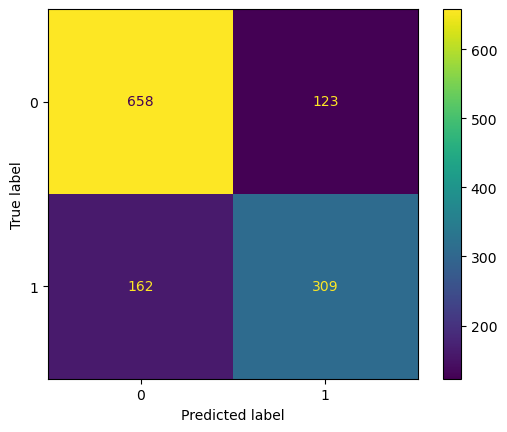

<Figure size 640x480 with 0 Axes>

In [49]:
# Se genera la matriz de confusión
mat_conf_log = confusion_matrix(pobre_test, y_pred_log)

print('Matriz de confusión:\n', mat_conf_log)

disp = ConfusionMatrixDisplay(confusion_matrix=mat_conf_log, display_labels=log_reg.classes_)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_log.png')

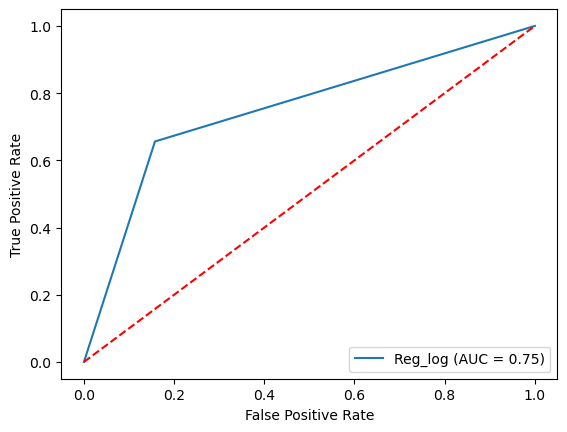

<Figure size 640x480 with 0 Axes>

In [50]:
# Se muestra la curva ROC
fpr_log, tpr_log, thresholds_log = roc_curve(pobre_test, y_pred_log)
auc_log = roc_auc_score(pobre_test, y_pred_log)
display = RocCurveDisplay(fpr=fpr_log, tpr=tpr_log, roc_auc=auc_log, estimator_name='Reg_log')
display.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()
plt.savefig('roc_curve_log.png')

In [51]:
# Se muestra el AUC y el Accuracy Score
print('AUC Logit: %.3f' % auc_log)
print('Accuracy Logit: %.3f' % accuracy_score(pobre_test, y_pred_log))

AUC Logit: 0.749
Accuracy Logit: 0.772


#### Análisis de discriminante lineal

In [52]:
# Se ajusta el clasificador con el método fit(); en este caso no es posible incorporar las ponderaciones
adl = LinearDiscriminantAnalysis()
adl.fit(respondieron_train, pobre_train)
# Se generan las predicciones
y_pred_adl = adl.predict(respondieron_test)

Matriz de confusión:
 [[655 126]
 [179 292]]


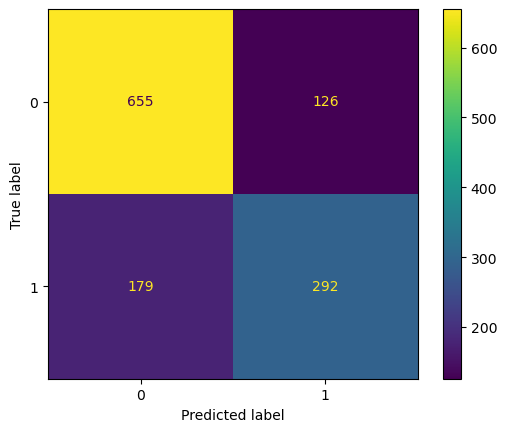

<Figure size 640x480 with 0 Axes>

In [53]:
# Se genera la matriz de confusión
mat_conf_adl = confusion_matrix(pobre_test, y_pred_adl)

print('Matriz de confusión:\n', mat_conf_adl)

disp = ConfusionMatrixDisplay(confusion_matrix=mat_conf_adl, display_labels=adl.classes_)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_adl.png')

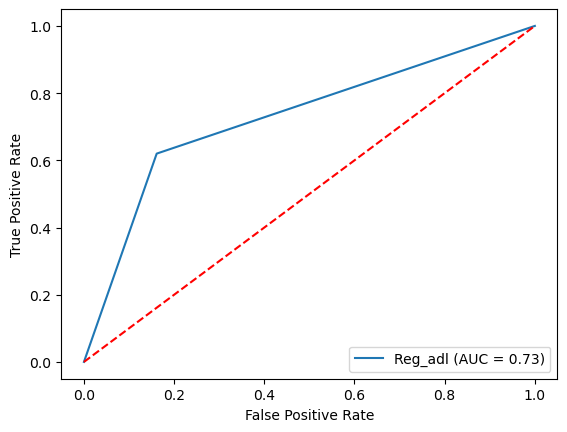

<Figure size 640x480 with 0 Axes>

In [54]:
# Se muestra la curva ROC
fpr_adl, tpr_adl, thresholds_adl = roc_curve(pobre_test, y_pred_adl)
auc_adl = roc_auc_score(pobre_test, y_pred_adl)
display = RocCurveDisplay(fpr=fpr_adl, tpr=tpr_adl, roc_auc=auc_adl, estimator_name='Reg_adl')
display.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()
plt.savefig('roc_curve_adl.png')

In [55]:
# Se muestra el AUC y el Accuracy Score
print('AUC ADL: %.3f' % auc_adl)
print('Accuracy ADL: %.3f' % accuracy_score(pobre_test, y_pred_adl))

AUC ADL: 0.729
Accuracy ADL: 0.756


#### KNN con k=3

In [56]:
# Se ajusta el clasificador con el método fit(); en este caso no es posible incorporar las ponderaciones
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(respondieron_train, pobre_train)
# Se generan las predicciones
y_pred_knn = knn.predict(respondieron_test)

Matriz de confusión:
 [[625 156]
 [227 244]]


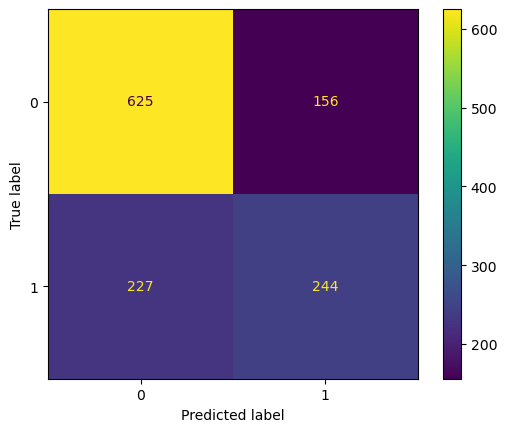

<Figure size 640x480 with 0 Axes>

In [57]:
# Se genera la matriz de confusión
mat_conf_knn = confusion_matrix(pobre_test, y_pred_knn)

print('Matriz de confusión:\n', mat_conf_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=mat_conf_knn, display_labels=knn.classes_)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_knn.png')

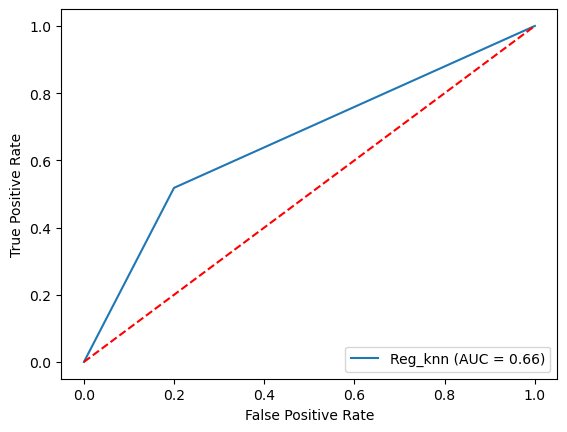

<Figure size 640x480 with 0 Axes>

In [58]:
# Se muestra la curva ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(pobre_test, y_pred_knn)
auc_knn = roc_auc_score(pobre_test, y_pred_knn)
display = RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn, roc_auc=auc_knn, estimator_name='Reg_knn')
display.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()
plt.savefig('roc_curve_knn.png')

In [59]:
# Se muestra el AUC y el Accuracy Score
print('AUC KNN: %.3f' % auc_knn)
print('Accuracy KNN: %.3f' % accuracy_score(pobre_test, y_pred_knn))

AUC KNN: 0.659
Accuracy KNN: 0.694


### Inciso 5

In [60]:
# Se genera la predicción para norespondieron
y_pred_score_nr = log_reg.predict(norespondieron)
y_pred_score_nr=np.where(y_pred_score_nr > 0.5, 1, y_pred_score_nr)
y_pred_score_nr=np.where(y_pred_score_nr <= 0.5, 0, y_pred_score_nr)

In [61]:
# Cantidad y porcentaje de pobres predichos en norespondieron
cant_pob_pred = y_pred_score_nr.sum()
porc_pob_pred = y_pred_score_nr.mean()
print(f"Cantidad de pobres predicha en la base 'norespondieron': {cant_pob_pred}")
print(f"Porcentaje de pobres predicho en la base 'norespondieron': {porc_pob_pred}")

Cantidad de pobres predicha en la base 'norespondieron': 987
Porcentaje de pobres predicho en la base 'norespondieron': 0.38005390835579517


### Inciso 6

In [62]:
column_list = list(respondieron_train.columns)
print(column_list)


['const', 'CH06', 'edad_2', 'H15_1', 'AGLOMERADO_33', 'CH03_2', 'CH03_3', 'CH03_4', 'CH03_5', 'CH03_6', 'CH03_7', 'CH03_8', 'CH03_9', 'CH03_10', 'CH04_1', 'CH07_2', 'CH07_3', 'CH07_4', 'CH07_5', 'CH08_2.0', 'CH08_3.0', 'CH08_4.0', 'CH08_12.0', 'CH09_2', 'CH09_3', 'CH10_1', 'CH10_2', 'CH10_3', 'CH10_9', 'CH11_1', 'CH11_2', 'CH11_9', 'CH12_1', 'CH12_2', 'CH12_3', 'CH12_4', 'CH12_5', 'CH12_6', 'CH12_7', 'CH12_8', 'CH12_9', 'CH12_99', 'CH13_1', 'CH13_2', 'CH15_2', 'CH15_3', 'CH15_4', 'CH15_5', 'CH15_9', 'CH16_1', 'CH16_2', 'CH16_3', 'CH16_4', 'CH16_5', 'CH16_6', 'CH16_9', 'NIVEL_ED_1', 'NIVEL_ED_2', 'NIVEL_ED_3', 'NIVEL_ED_4', 'NIVEL_ED_5', 'NIVEL_ED_6', 'ESTADO_2', 'ESTADO_3', 'ESTADO_4', 'CAT_OCUP_1', 'CAT_OCUP_2', 'CAT_OCUP_3', 'CAT_OCUP_4', 'CAT_INAC_1', 'CAT_INAC_2', 'CAT_INAC_3', 'CAT_INAC_4', 'CAT_INAC_5', 'CAT_INAC_6', 'CAT_INAC_7', 'IMPUTA_1.0', 'PP02C1_1', 'PP02C1_2', 'PP02C2_1', 'PP02C2_2', 'PP02C3_1', 'PP02C3_2', 'PP02C4_1', 'PP02C4_2', 'PP02C5_1', 'PP02C5_2', 'PP02C6_1', 'PP02

In [63]:
# Se seleccionan las variables que más se espera que sean buenas predictoras de la pobreza
respond_train_cons= respondieron_train[['const',"CH04_1","CH06",'CH07_2', 'CH07_3', 'CH07_4', 'CH07_5', 'CH08_2.0', 'CH08_3.0', 'CH08_4.0', 'CH08_12.0',"CH09_2","CH09_3","CH11_2",'CH15_4','NIVEL_ED_1', 'NIVEL_ED_2', 'NIVEL_ED_3', 'NIVEL_ED_4', 'NIVEL_ED_5', 'NIVEL_ED_6', 'ESTADO_2', 'ESTADO_3', 'ESTADO_4','AGLOMERADO_33','CAT_OCUP_1', 'CAT_OCUP_2', 'CAT_OCUP_3', 'CAT_OCUP_4', 'CAT_INAC_1', 'CAT_INAC_2', 'CAT_INAC_3', 'CAT_INAC_4', 'CAT_INAC_5', 'CAT_INAC_6', 'CAT_INAC_7', 'PP02I_1', 'PP02I_2']]
respond_test_cons= respondieron_test[['const',"CH04_1","CH06",'CH07_2', 'CH07_3', 'CH07_4', 'CH07_5', 'CH08_2.0', 'CH08_3.0', 'CH08_4.0', 'CH08_12.0',"CH09_2","CH09_3","CH11_2",'CH15_4','NIVEL_ED_1', 'NIVEL_ED_2', 'NIVEL_ED_3', 'NIVEL_ED_4', 'NIVEL_ED_5', 'NIVEL_ED_6', 'ESTADO_2', 'ESTADO_3', 'ESTADO_4','AGLOMERADO_33','CAT_OCUP_1', 'CAT_OCUP_2', 'CAT_OCUP_3', 'CAT_OCUP_4', 'CAT_INAC_1', 'CAT_INAC_2', 'CAT_INAC_3', 'CAT_INAC_4', 'CAT_INAC_5', 'CAT_INAC_6', 'CAT_INAC_7', 'PP02I_1', 'PP02I_2']]

In [64]:
# Se ajusta nuevo el clasificador logit
log_reg2 = LogisticRegression(solver='liblinear')
log_reg2.fit(respond_train_cons, pobre_train, sample_weight=ponds_train)

LogisticRegression(solver='liblinear')

In [65]:
# Se genera la probabilidad predicha
y_pred_score_log2 = log_reg2.predict_proba(respond_test_cons)[:,1]

# Se convierten las probabilidades predichas en predicciones, con la regla de Bayes
y_pred_log2 = 0
y_pred_log2 = np.where(y_pred_score_log2 > 0.5, 1, y_pred_log2)
y_pred_log2 = np.where(y_pred_score_log2 <= 0.5, 0, y_pred_log2)

Matriz de confusión:
 [[661 120]
 [170 301]]


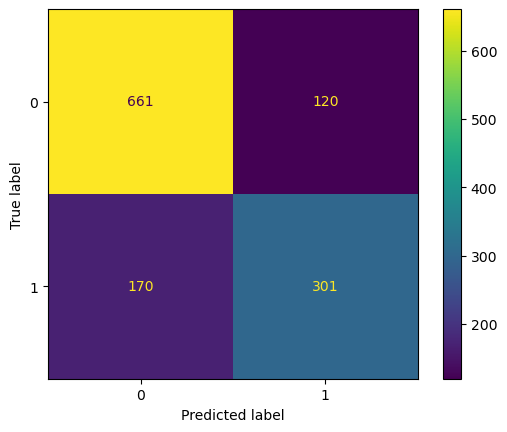

<Figure size 640x480 with 0 Axes>

In [66]:
# Se genera la matriz de confusión
mat_conf_log2 = confusion_matrix(pobre_test, y_pred_log2)

print('Matriz de confusión:\n', mat_conf_log2)

disp = ConfusionMatrixDisplay(confusion_matrix=mat_conf_log2, display_labels=log_reg2.classes_)
disp.plot()
plt.show()
plt.savefig('confusion_matrix_log2.png')

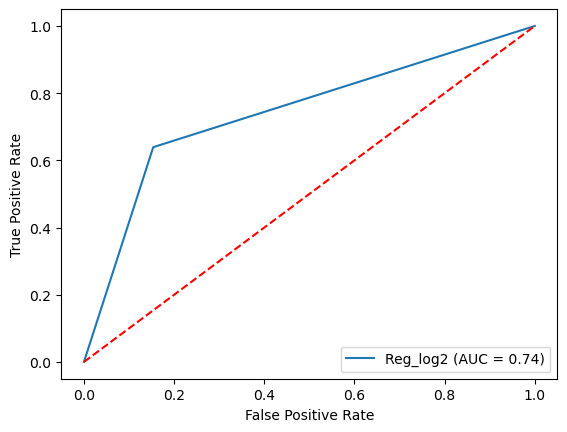

<Figure size 640x480 with 0 Axes>

In [67]:
# Se muestra la curva ROC
fpr_log2, tpr_log2, thresholds_log2 = roc_curve(pobre_test, y_pred_log2)
auc_log2 = roc_auc_score(pobre_test, y_pred_log2)
display = RocCurveDisplay(fpr=fpr_log2, tpr=tpr_log2, roc_auc=auc_log2, estimator_name='Reg_log2')
display.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()
plt.savefig('roc_curve_log2.png')

In [68]:
# Se muestra el AUC y el Accuracy Score
print('AUC Logit: %.3f' % auc_log2)
print('Accuracy Logit: %.3f' % accuracy_score(pobre_test, y_pred_log2))

AUC Logit: 0.743
Accuracy Logit: 0.768
